In [1]:
from easydict import EasyDict
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Initialize args with parameters using EasyDict
args = EasyDict({
    "path_data": r"data",
    "k_frame": 4,
    "batch_size": 4,
    "preprocess_workers": 0,
    "interval": 4,
    "train": True,
    "val": True,
    "test": False,
    "test_index": 64,
})


Using device: cpu


In [6]:
!python preprocessing.py --seq_root "data" --train --val

train
dancetrack0001
dancetrack0002
dancetrack0006
dancetrack0008
dancetrack0012
dancetrack0015
dancetrack0016
dancetrack0020
dancetrack0023
dancetrack0024
dancetrack0027
dancetrack0029
dancetrack0032
dancetrack0033
dancetrack0037
dancetrack0039
dancetrack0044
dancetrack0045
dancetrack0049
dancetrack0051
dancetrack0052
dancetrack0053
dancetrack0055
dancetrack0057
dancetrack0061
dancetrack0062
dancetrack0066
dancetrack0068
dancetrack0069
dancetrack0072
dancetrack0074
dancetrack0075
dancetrack0080
dancetrack0082
dancetrack0083
dancetrack0086
dancetrack0087
dancetrack0096
dancetrack0098
dancetrack0099
val
dancetrack0004
dancetrack0005
dancetrack0007
dancetrack0010
dancetrack0014
dancetrack0018
dancetrack0019
dancetrack0025
dancetrack0026
dancetrack0030
dancetrack0034
dancetrack0035
dancetrack0041
dancetrack0043
dancetrack0047
dancetrack0058
dancetrack0063
dancetrack0065
dancetrack0073
dancetrack0077
dancetrack0079
dancetrack0081
dancetrack0090
dancetrack0094
dancetrack0097


In [5]:
label_root

'data/trackers_gt_t'

In [6]:
label_path

'data/trackers_gt_t/val'

In [4]:
from dataset.dataset import DiffMOTDataset, DiffMOTDataLoader

label_root = args.path_data + "/trackers_gt_t"

if args.train:
    label_path = label_root + "/train"
    print("Train Dataset: " + label_path)
    train_dataset = DiffMOTDataset(path=label_path, config=args)
    train_data_loader = DiffMOTDataLoader(train_dataset, config=args)
    print("len: ", len(train_dataset))

if args.val:
    print("="*80)
    label_path = label_root + "/val"
    print("Validation Dataset: " + label_path)
    val_dataset = DiffMOTDataset(path=label_path, config=args)
    val_data_loader = DiffMOTDataLoader(val_dataset, config=args)
    print("len: ", len(val_dataset))

Train Dataset: data/trackers_gt_t/train
len:  346835
Validation Dataset: data/trackers_gt_t/val
len:  223783


In [5]:
print("Example dataset:")
index = 730
item = train_dataset[index]
print(item)

bbox = original_shape(item['cur_bbox'], item['width'], item['height'])
image_path = item['image_path']
bbox, image_path

Example dataset:
{'cur_gt': array([0.00000e+00, 4.40000e+01, 4.12500e-01, 6.33333e-01, 7.65630e-02,
       2.36111e-01, 1.00000e+00, 1.28000e+03, 7.20000e+02], dtype=float32), 'cur_bbox': array([0.4125  , 0.633333, 0.076563, 0.236111], dtype=float32), 'condition': array([[ 0.395313  ,  0.632639  ,  0.053125  ,  0.231944  , -0.00312501,
        -0.00069404, -0.017187  , -0.00138901],
       [ 0.398828  ,  0.632639  ,  0.053906  ,  0.234722  ,  0.00351501,
         0.        ,  0.000781  ,  0.00277801],
       [ 0.408984  ,  0.633333  ,  0.072656  ,  0.236111  ,  0.01015601,
         0.00069404,  0.01875   ,  0.001389  ],
       [ 0.411328  ,  0.633333  ,  0.071094  ,  0.236111  ,  0.00234398,
         0.        , -0.001562  ,  0.        ]], dtype=float32), 'delta_bbox': array([0.00117201, 0.        , 0.005469  , 0.        ], dtype=float32), 'width': 1280.0, 'height': 720.0, 'image_path': 'data/train/dancetrack0001/img1/00000044.jpg'}


(array([[479., 371.,  98., 170.]], dtype=float32),
 'data/train/dancetrack0001/img1/00000044.jpg')

BOX


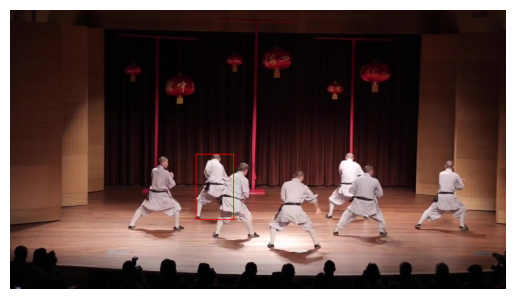

In [6]:
print("BOX")
visualize_bbox(image_path, bbox)